In [52]:
# Importamos las librerias necesarias para la elaboracion del proyecto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer

In [53]:
path = '/Users/ivanm/Downloads/archive (1)/job_placement.csv'
df = pd.read_csv(path)
# Dropeamos la columnas id y name ya que no aportan ningun valor a nuestro analisis
df.drop('id', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.head()

,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
3,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
4,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0


In [54]:
encoded_df = df.copy()

In [55]:
encoder = LabelEncoder()

encoded_df['gender'] = encoder.fit_transform(encoded_df['gender'])
encoded_df['stream'] = encoder.fit_transform(encoded_df['stream'])
encoded_df['college_name'] = encoder.fit_transform(encoded_df['college_name'])
encoded_df['placement_status'] = encoder.fit_transform(encoded_df['placement_status'])

encoded_df.drop('degree', axis=1, inplace=True)

encoded_df

,gender,age,stream,college_name,placement_status,salary,gpa,years_of_experience
0,1,25,0,5,1,60000,3.7,2.0
1,0,24,1,7,1,65000,3.6,1.0
2,1,26,4,11,1,58000,3.8,3.0
3,0,23,3,43,0,0,3.5,2.0
4,1,24,0,9,1,62000,3.9,2.0
...,...,...,...,...,...,...,...,...
695,1,23,0,41,1,67000,3.8,3.0
696,0,26,2,12,1,66000,3.9,3.0
697,1,24,0,27,1,65000,3.8,3.0
698,0,23,1,22,1,66000,3.7,2.0


In [56]:
v = encoded_df['years_of_experience'].median()  
encoded_df['years_of_experience'].fillna(v, inplace=True)

In [57]:
encoded_df.isna().sum()

gender                 0
age                    0
stream                 0
college_name           0
placement_status       0
salary                 0
gpa                    0
years_of_experience    0
dtype: int64

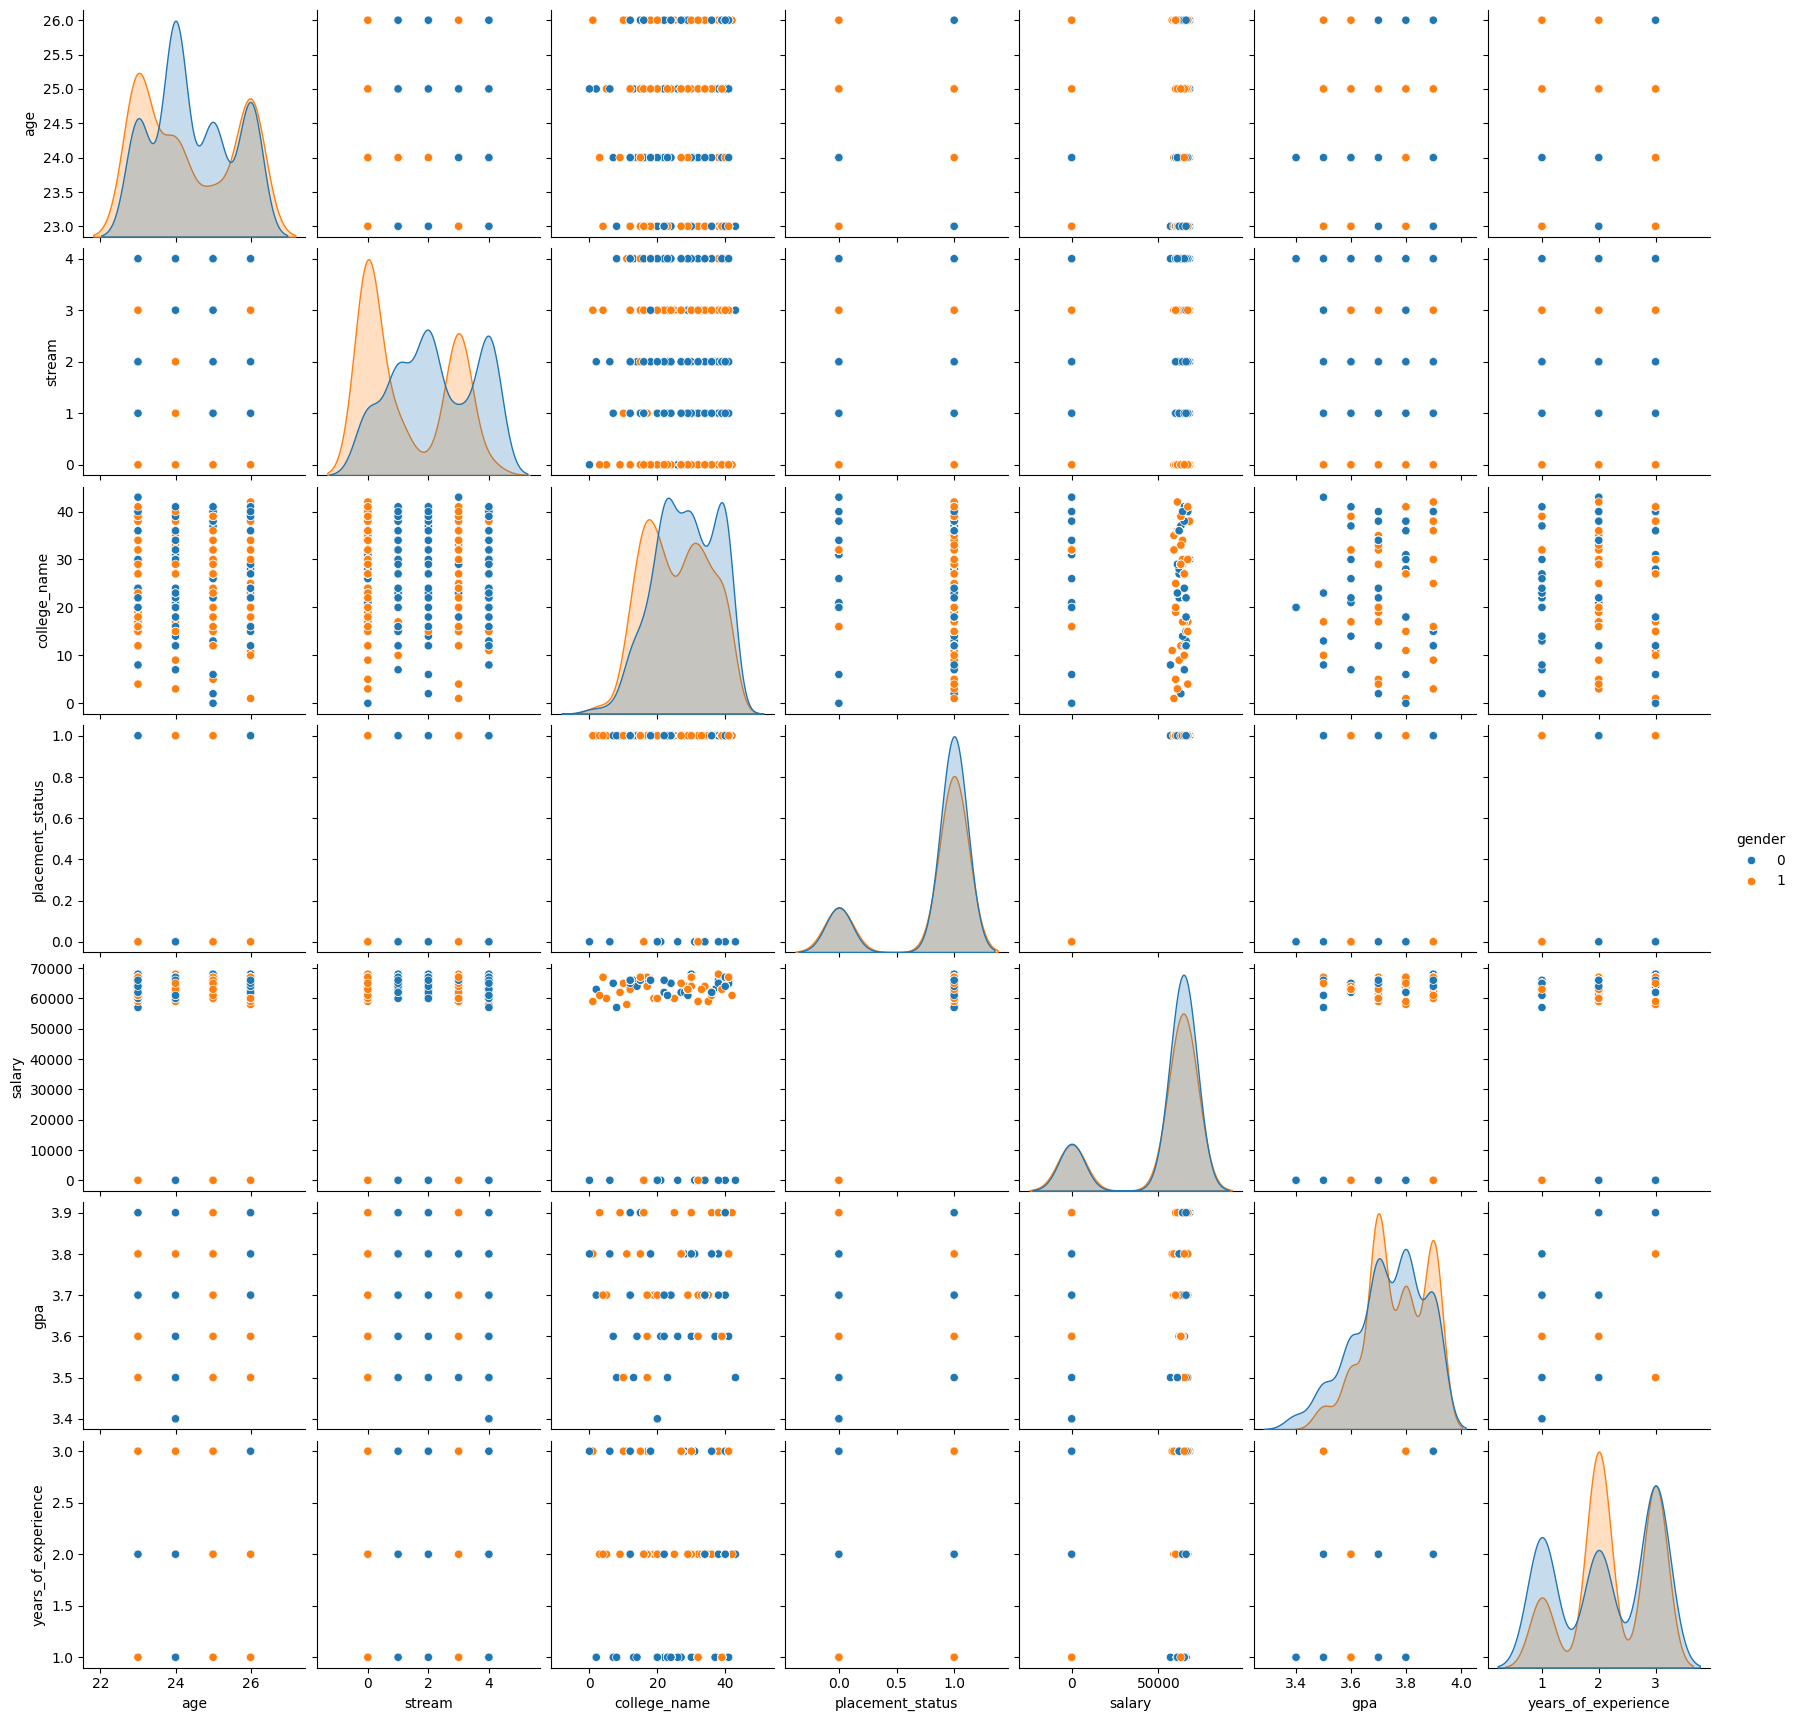

In [58]:
sns.pairplot(encoded_df, hue='gender')

<Axes: >

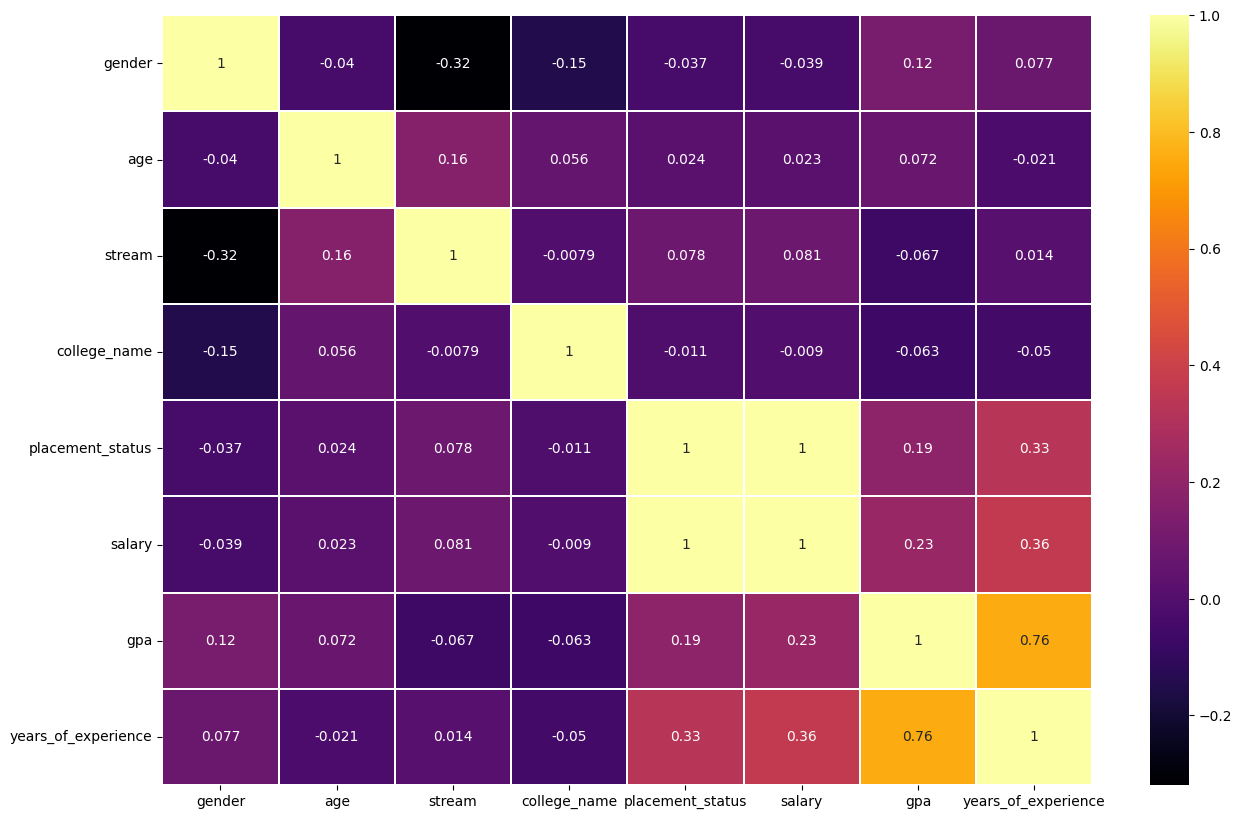

In [59]:
plt.figure(figsize=(15,10))
sns.heatmap(encoded_df.corr(), cmap='inferno', annot=True, linewidths=0.1, xticklabels=True, yticklabels=True)

In [60]:
df.describe()

,age,salary,gpa,years_of_experience
count,700.000000,700.000000,700.000000,699.000000
mean,24.411429,52474.285714,3.750429,2.177396
std,1.164268,25160.331005,0.121212,0.779393
min,23.000000,0.000000,3.400000,1.000000
25%,23.000000,61000.000000,3.700000,2.000000
50%,24.000000,64000.000000,3.800000,2.000000
75%,26.000000,66000.000000,3.900000,3.000000
max,26.000000,68000.000000,3.900000,3.000000


In [61]:
# Hacemos el conteo de los NaN y descubrimos que solo existe un NaN en la columna 
# 'years_of_experience', procederemos a sustituir este valor faltante por la mediana para no alterar la distribucion
df.isna().sum()
df['years_of_experience'].fillna(df['years_of_experience'].median(), inplace=True)

In [62]:
df['stream'].unique()

array(['Computer Science', 'Electrical Engineering',
       'Mechanical Engineering', 'Information Technology',
       'Electronics and Communication'], dtype=object)

In [63]:
df['college_name'].unique()

array(['Harvard University', 'Massachusetts Institute of Technology',
       'Stanford University', 'Yale University', 'Princeton University',
       'Columbia University', 'California Institute of Technology',
       'University of Chicago', 'University of Pennsylvania',
       'Northwestern University', 'Duke University',
       'Johns Hopkins University', 'University of California--Berkeley',
       'University of Michigan--Ann Arbor',
       'University of California--Los Angeles', 'University of Virginia',
       'University of Wisconsin--Madison',
       'University of Illinois--Urbana-Champaign',
       'University of North Carolina--Chapel Hill',
       'University of Washington', 'University of California--San Diego',
       'University of Texas--Austin',
       'University of California--Santa Barbara',
       'University of Southern California', 'University of Florida',
       'University of Minnesota--Twin Cities',
       'University of Maryland--College Park',
       'Univ

In [64]:
df['salary'].unique()

array([60000, 65000, 58000,     0, 62000, 63000, 59000, 64000, 57000,
       61000, 66000, 67000, 68000], dtype=int64)

Text(0, 0.5, '')

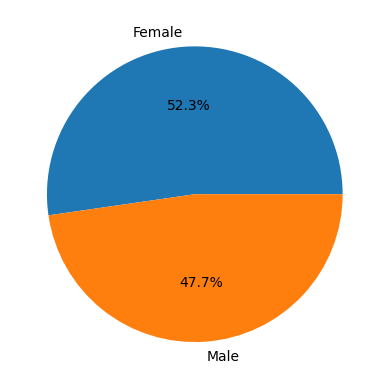

In [65]:
df['gender'].value_counts().plot(kind='pie', autopct="%0.1f%%")

plt.ylabel('')

Text(0, 0.5, '')

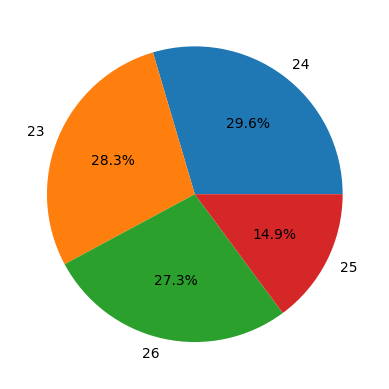

In [66]:
df['age'].value_counts().plot(kind='pie', autopct="%0.1f%%")

plt.ylabel('')

Text(0, 0.5, 'Numero de personas')

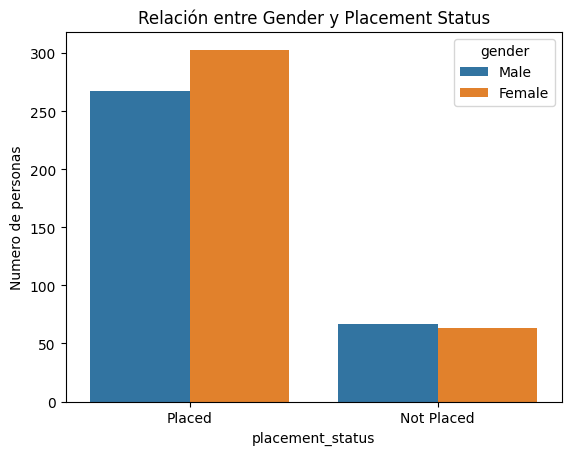

In [67]:
sns.countplot(x='placement_status', hue='gender', data=df)
plt.title('Relación entre Gender y Placement Status')
plt.ylabel('Numero de personas')

Text(0.5, 0, 'Carrera')

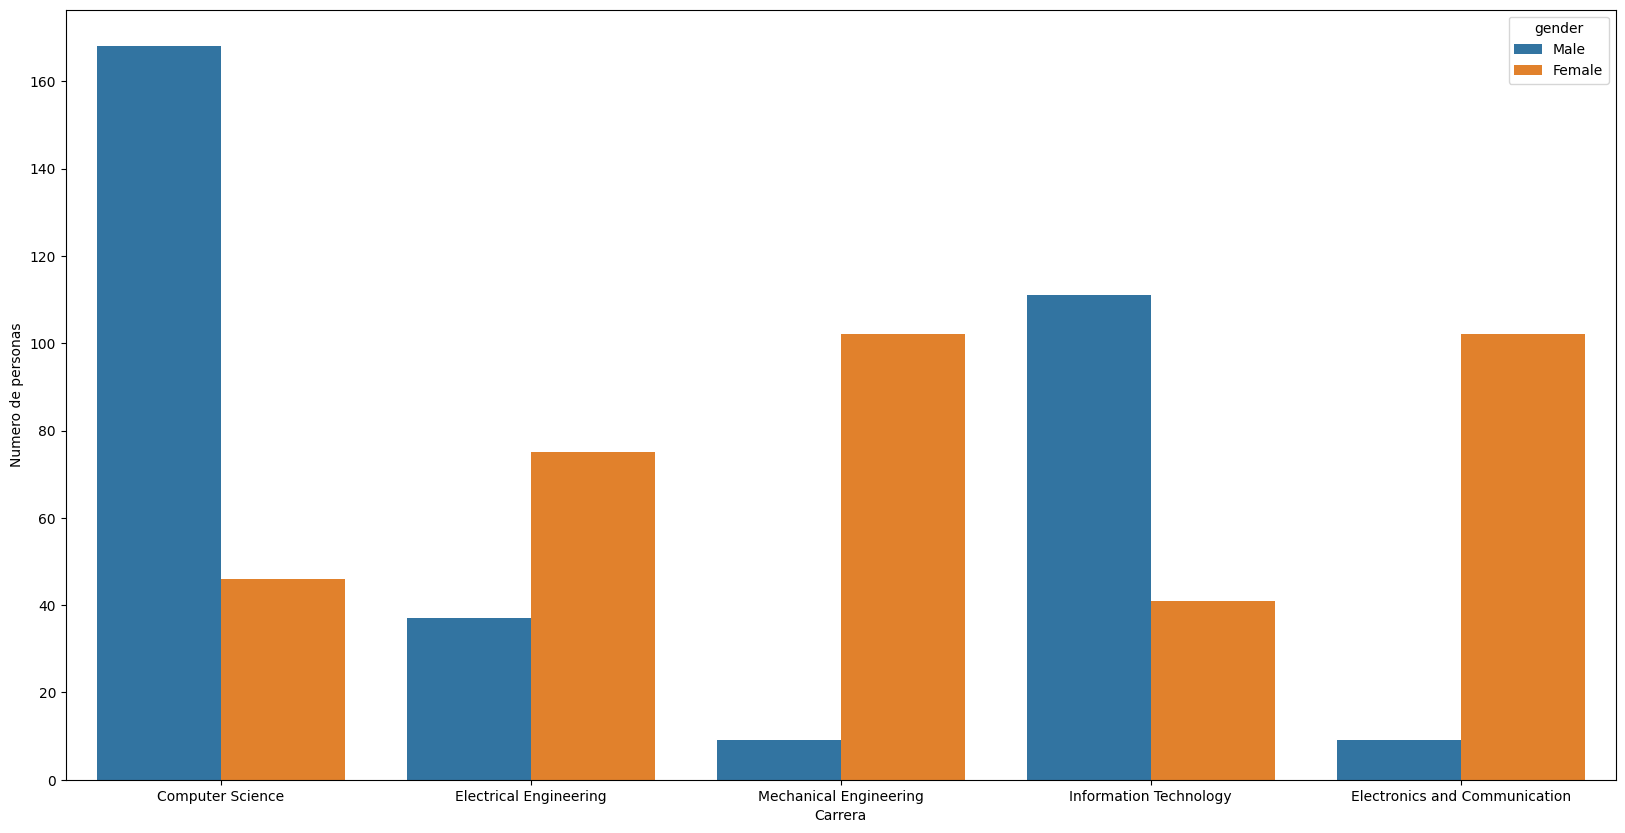

In [68]:
plt.figure(figsize=(20,10))
sns.countplot(x='stream', hue='gender', data=df)
plt.ylabel('Numero de personas')
plt.xlabel('Carrera')

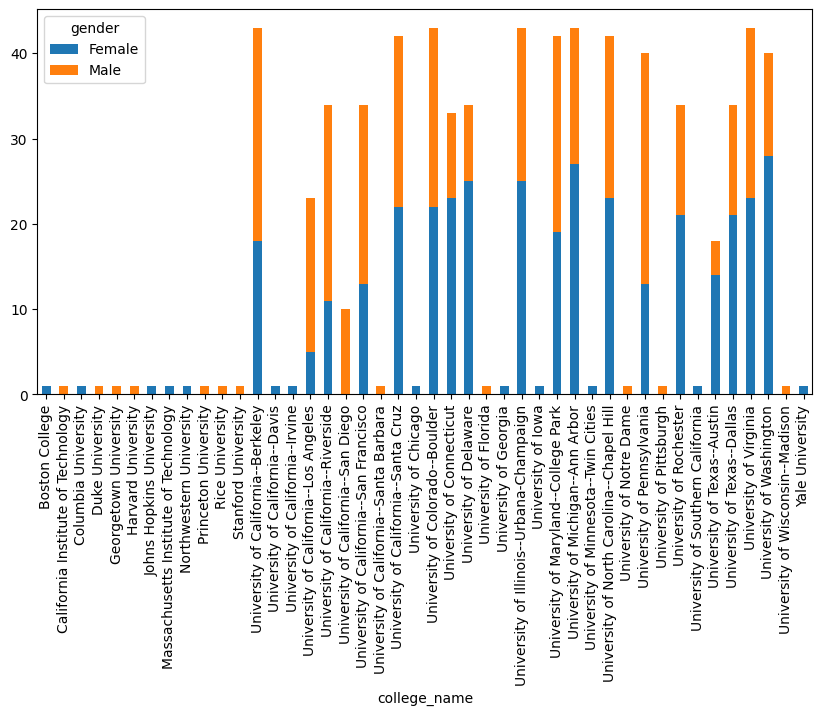

In [69]:
gen_collname = pd.crosstab(df['college_name'], df['gender'])
gen_collname.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.show()

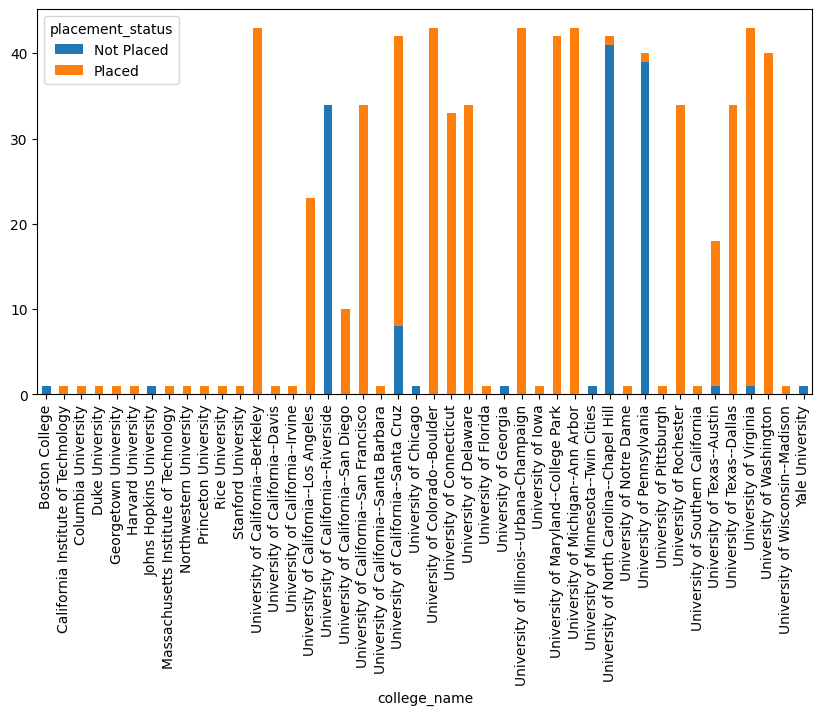

In [70]:
collname_placementst = pd.crosstab(df['college_name'], df['placement_status'])
collname_placementst.plot(kind='bar', stacked=True, figsize=(10, 5))

plt.show()


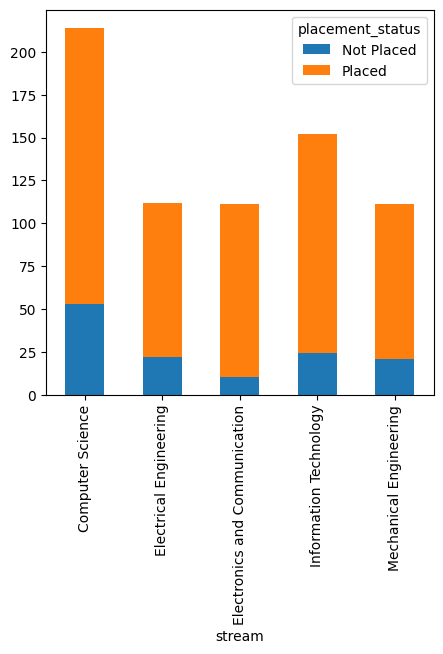

In [71]:
stream_placementst = pd.crosstab(df['stream'], df['placement_status'])
stream_placementst.plot(kind='bar', stacked=True, figsize=(5, 5))

plt.show()


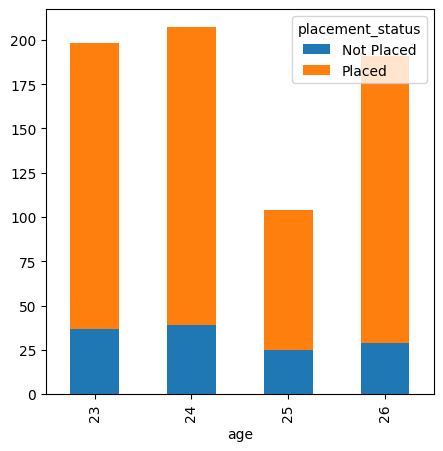

In [72]:
age_placementst = pd.crosstab(df['age'], df['placement_status'])
age_placementst.plot(kind='bar', stacked=True, figsize=(5, 5))

plt.show()

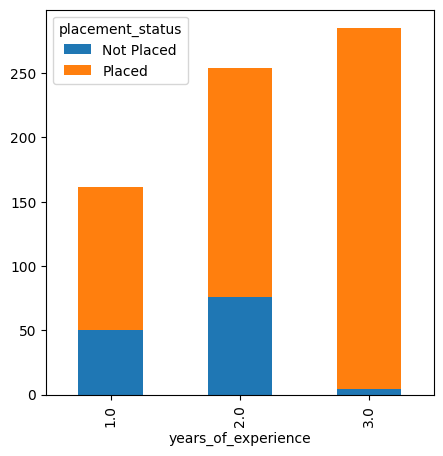

In [73]:
yoe_placementst = pd.crosstab(df['years_of_experience'], df['placement_status'])
yoe_placementst.plot(kind='bar', stacked=True, figsize=(5, 5))

plt.show()

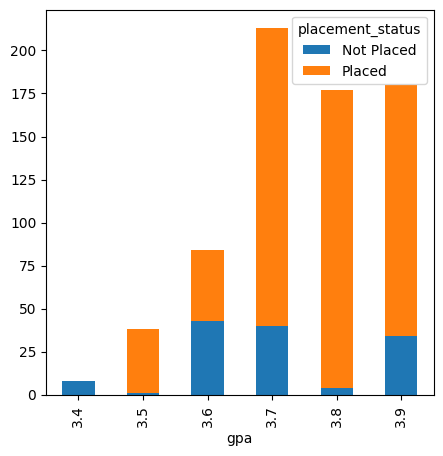

In [74]:
gpa_placementst = pd.crosstab(df['gpa'], df['placement_status'])
gpa_placementst.plot(kind='bar', stacked=True, figsize=(5, 5))

plt.show()

<Axes: xlabel='gpa', ylabel='placement_status'>

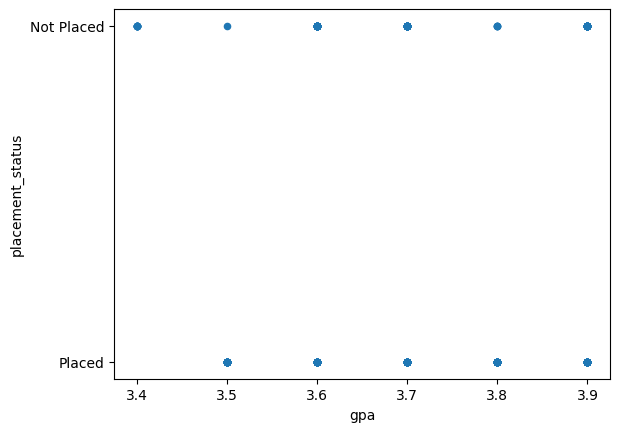

In [75]:
df[['gpa','placement_status']].plot.scatter(x='gpa', y='placement_status')

In [76]:
df[df['placement_status'] == 'Not Placed']

,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
3,Female,23,Bachelor's,Information Technology,Yale University,Not Placed,0,3.5,2.0
7,Female,24,Bachelor's,Computer Science,University of Chicago,Not Placed,0,3.6,2.0
11,Female,25,Bachelor's,Electronics and Communication,Johns Hopkins University,Not Placed,0,3.8,3.0
15,Female,25,Bachelor's,Mechanical Engineering,University of Virginia,Not Placed,0,3.7,2.0
21,Female,26,Bachelor's,Mechanical Engineering,University of Texas--Austin,Not Placed,0,3.8,3.0
...,...,...,...,...,...,...,...,...,...
678,Male,25,Bachelor's,Computer Science,University of Pennsylvania,Not Placed,0,3.7,2.0
683,Female,26,Bachelor's,Electronics and Communication,University of North Carolina--Chapel Hill,Not Placed,0,3.6,1.0
688,Male,23,Bachelor's,Computer Science,University of California--Riverside,Not Placed,0,3.9,2.0
694,Female,24,Bachelor's,Mechanical Engineering,University of Pennsylvania,Not Placed,0,3.7,2.0


In [77]:
df[df['placement_status'] == 'Placed']
## Regresion: Definir la probabilidad de obtener un trabajo en base a la universidad de origen
## Experiencia, GPA

## Clasificacion, Definir rangos de sueldo, bien, mal o regular sueldo.

,gender,age,degree,stream,college_name,placement_status,salary,gpa,years_of_experience
0,Male,25,Bachelor's,Computer Science,Harvard University,Placed,60000,3.7,2.0
1,Female,24,Bachelor's,Electrical Engineering,Massachusetts Institute of Technology,Placed,65000,3.6,1.0
2,Male,26,Bachelor's,Mechanical Engineering,Stanford University,Placed,58000,3.8,3.0
4,Male,24,Bachelor's,Computer Science,Princeton University,Placed,62000,3.9,2.0
5,Female,25,Bachelor's,Electronics and Communication,Columbia University,Placed,63000,3.7,1.0
...,...,...,...,...,...,...,...,...,...
693,Male,26,Bachelor's,Information Technology,University of Michigan--Ann Arbor,Placed,67000,3.9,3.0
695,Male,23,Bachelor's,Computer Science,University of Washington,Placed,67000,3.8,3.0
696,Female,26,Bachelor's,Electronics and Communication,University of California--Berkeley,Placed,66000,3.9,3.0
697,Male,24,Bachelor's,Computer Science,University of Illinois--Urbana-Champaign,Placed,65000,3.8,3.0


In [78]:
parameters = ['gender', 'age', 'stream', 'college_name', 'gpa', 'years_of_experience']

In [79]:
x = encoded_df.loc[ :, parameters].values
y = encoded_df.loc[ :, 'placement_status'].values

In [80]:
scaler = PowerTransformer()
x = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10, test_size=0.2)
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train, y_train)

In [81]:
x_train

array([[ 1.04680867,  1.31344646, -1.29213617,  1.62835732,  1.35358506,
        -0.29675947],
       [-0.95528441,  0.57120734,  0.31650409,  1.5174552 ,  0.32803017,
         1.08670208],
       [-0.95528441, -1.27128009, -0.36228438,  0.96527338,  0.32803017,
         1.08670208],
       ...,
       [-0.95528441, -0.28290038,  1.34774999,  0.58989602, -1.02442269,
        -1.12037849],
       [ 1.04680867,  1.31344646,  0.87079465, -1.19336597,  1.35358506,
        -0.29675947],
       [ 1.04680867, -0.30493339, -1.29213617,  0.52656093, -1.22816928,
        -1.45548564]])

In [82]:
model = LogisticRegression()

model.fit(x_train, y_train)
prediction = model.predict(x_test)
score = accuracy_score(y_test, prediction)
report = classification_report(y_test, prediction)

score

0.65